In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1. Split the dataset into training (80%) and testing (20%) sets.
- It's already splitted

In [2]:
data_path = "../data/"
X_train = pd.read_csv(os.path.join(data_path, "X_train_selected.csv"))
X_test = pd.read_csv(os.path.join(data_path, "X_test_selected.csv"))
y_train = pd.read_csv(os.path.join(data_path, "y_train.csv"))
y_test = pd.read_csv(os.path.join(data_path, "y_test.csv"))

In [3]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (237, 10)
X_test shape: (60, 10)
y_train shape: (237, 1)
y_test shape: (60, 1)


---

# 2. Train the following models:
**Steps:**
* Train simple baseline models (e.g., Logistic Regression, Decision Tree).
* Evaluate models using accuracy and other basic metrics.
* Compare results to see which model performs better as a starting point.

In [4]:
models = {}
predictions = {}
probabilities = {}

In [5]:
logR = LogisticRegression(solver='liblinear', random_state=42, max_iter=200)
logR.fit(X_train, y_train)

y_pred = logR.predict(X_test)
y_proba = logR.predict_proba(X_test)[:, 1]

models['Logistic Regression'] = logR
predictions['Logistic Regression'] = y_pred
probabilities['Logistic Regression'] = y_proba

c:\Users\mazen\anaconda3\envs\heart_env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
y_proba = decision_tree.predict_proba(X_test)[:, 1]

models['Decision Tree'] = decision_tree
predictions['Decision Tree'] = y_pred
probabilities['Decision Tree'] = y_proba

In [7]:
randomForest = RandomForestClassifier(n_estimators=100, random_state=42)
randomForest.fit(X_train, y_train)

y_pred = randomForest.predict(X_test)
y_proba = randomForest.predict_proba(X_test)[:, 1]

models['Random Forest'] = randomForest
predictions['Random Forest'] = y_pred
probabilities['Random Forest'] = y_proba

c:\Users\mazen\anaconda3\envs\heart_env\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [8]:
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
y_proba = svc.predict_proba(X_test)[:, 1]

models['Support Vector Classifier'] = svc
predictions['Support Vector Classifier'] = y_pred
probabilities['Support Vector Classifier'] = y_proba

c:\Users\mazen\anaconda3\envs\heart_env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Results:**

* Baseline models trained successfully.
* Performance metrics recorded for each model.
* Identified which model gives the strongest baseline performance.

---

# 3. Evaluate models using:
**Steps:**
* Calculate accuracy, precision, recall, F1-score.
* Plot accuracy and other metrics for easy comparison.

Model Evaluation

Logistic Regression Performance :
	Accuracy: 0.8833
	Precision: 0.8696
	Recall: 0.8333
	F1-Score: 0.8511
	AUC: 0.9329

Decision Tree Performance :
	Accuracy: 0.6833
	Precision: 0.6190
	Recall: 0.5417
	F1-Score: 0.5778
	AUC: 0.6597

Random Forest Performance :
	Accuracy: 0.8500
	Precision: 0.8261
	Recall: 0.7917
	F1-Score: 0.8085
	AUC: 0.9288

Support Vector Classifier Performance :
	Accuracy: 0.8167
	Precision: 0.8421
	Recall: 0.6667
	F1-Score: 0.7442
	AUC: 0.9282


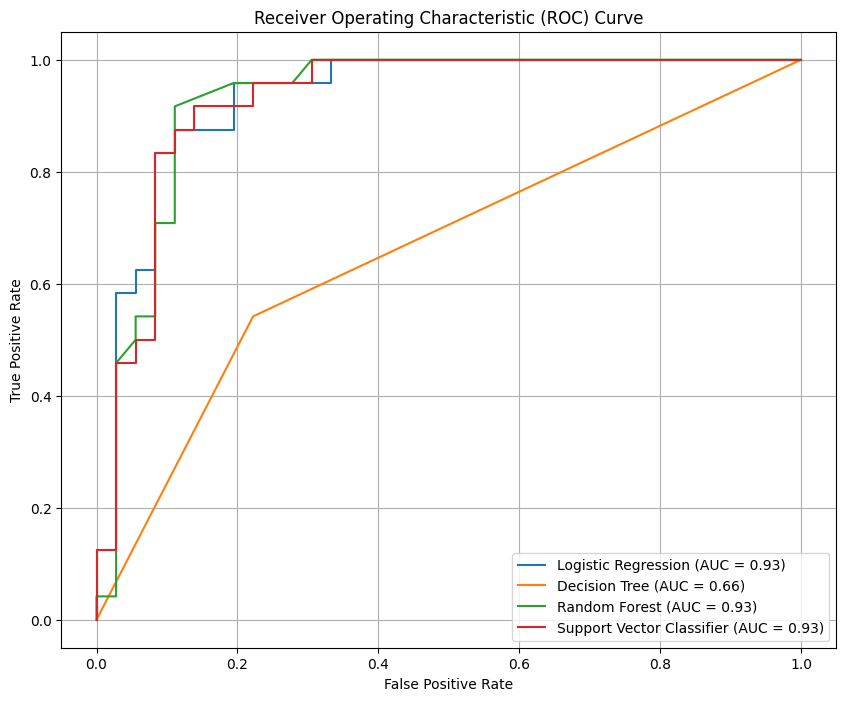

In [9]:
print("Model Evaluation")

evaluation_results = {}
plt.figure(figsize=(10, 8))

for name, model in models.items():
    print(f"\n{name} Performance :")
    y_pred = predictions[name]
    y_proba = probabilities[name]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': roc_auc
    }

    print(f"\tAccuracy: {accuracy:.4f}")
    print(f"\tPrecision: {precision:.4f}")
    print(f"\tRecall: {recall:.4f}")
    print(f"\tF1-Score: {f1:.4f}")
    print(f"\tAUC: {roc_auc:.4f}")

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


Precision-Recall Curve Evaluation
Logistic Regression Performance :
	Average Precision: 0.8734

Decision Tree Performance :
	Average Precision: 0.5187

Random Forest Performance :
	Average Precision: 0.8369

Support Vector Classifier Performance :
	Average Precision: 0.8613



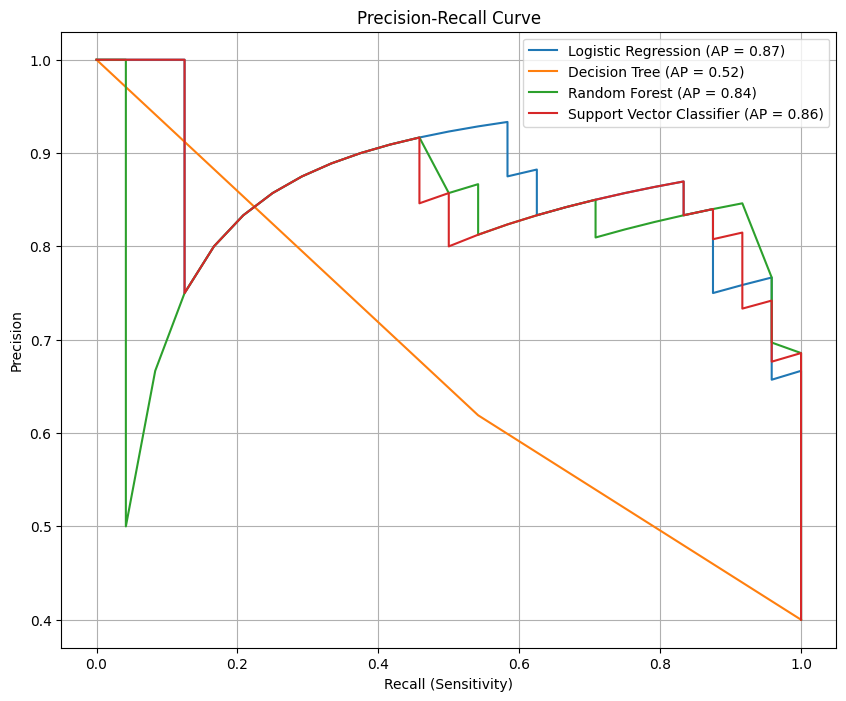

In [10]:
print("Precision-Recall Curve Evaluation")

plt.figure(figsize=(10, 8))

for name, model in models.items():
    print(f"{name} Performance :")
    y_proba = probabilities[name]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)

    print(f"\tAverage Precision: {avg_precision:.4f}\n")

    plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.2f})')

plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

**Results:**

* Visualizations confirm metric results.
* Easier to interpret differences between models.
* Clear evidence of which supervised learning method works best.